In [1]:
%matplotlib widget
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
table = pd.read_excel("hyphal_length.xlsx")
table = table.loc[table["Title"]!=" External hyphal production of vesicular-arbuscular mycorrhizal fungi in pasture and tallgrass prairie communities"]

table["hypha_mm_mm3"] = table["hypha_m_cm3"]
table["abs_lat"] = abs(table["lat"])
table["colonization_perc"] = table["colonization_perc"].astype(str).str.replace("na","nan").replace("nann","nan").astype(float)
table["symbiont_genus"].replace('Natural ', 'Natural', inplace=True)
table["pot_field"].replace('fieled', 'field', inplace=True)

table['bulk_density_g/cm3'].fillna(1, inplace=True)
table['hypha_m_cm3'].fillna(table['hypha_cm_g'] * table['bulk_density_g/cm3']/100, inplace=True)

Text(0.5, 0, 'hyphal density ($m.cm^{-3}$)')

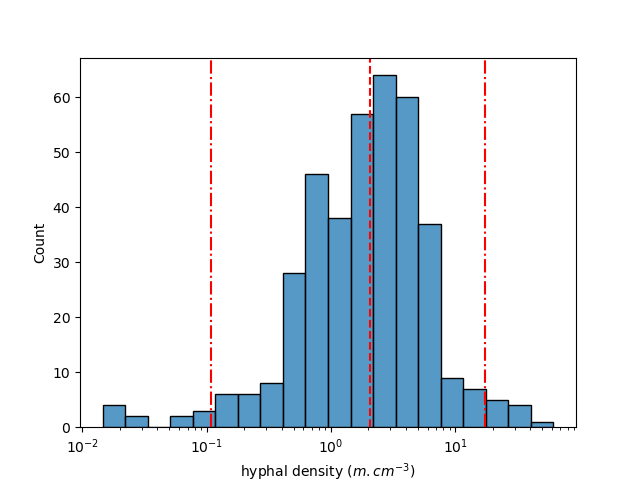

In [22]:
%matplotlib widget
select= table.loc[table["hypha_m_cm3"]>=0]
median = np.median(select["hypha_m_cm3"])
lower_bound = np.percentile(select["hypha_m_cm3"], 2.5)
upper_bound = np.percentile(select["hypha_m_cm3"], 97.5)

# Plot the histogram
sns.histplot(select, x="hypha_m_cm3", log_scale=True)

# Add red lines for the median and interval boundaries
plt.axvline(median, color="red", linestyle="--", label="Median")
plt.axvline(lower_bound,0,60, color="red", linestyle="-.", label="Lower Bound (2.5%)")
plt.axvline(upper_bound,0,60, color="red", linestyle="-.", label="Upper Bound (97.5%)")
plt.xlabel('hyphal density ($m.cm^{-3}$)')

In [4]:
upper_bound, lower_bound, np.max(select["hypha_m_cm3"]),np.min(select["hypha_m_cm3"])

(17.44749999999991, 0.10812000000000001, 61.6, 0.014499999999999999)

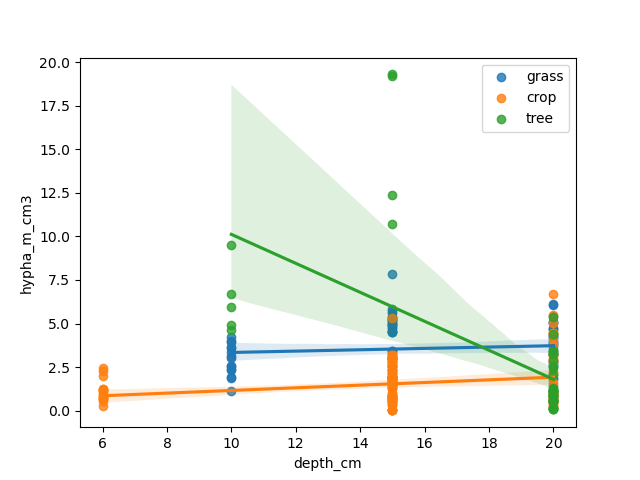

In [23]:
%matplotlib widget
select = table.loc[table["depth_cm"]<=30]
select = select.loc[select["pot_field"]=="field"]
for plant in ["grass","crop","tree"]:
    select_plot = select.loc[select["plant_functional_type"]==plant]
    # select = table
    sns.regplot(select_plot,x="depth_cm",y="hypha_m_cm3",label=plant)
# plt.yscale("log")
plt.legend()

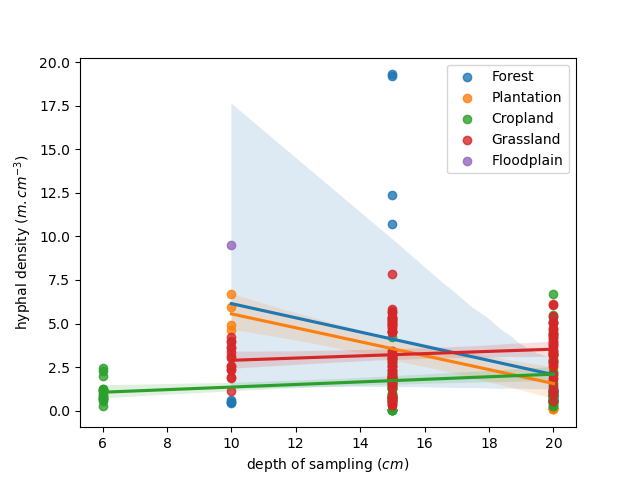

In [31]:
%matplotlib widget
select = table.loc[table["depth_cm"]<=30]
select = select.loc[select["pot_field"]=="field"]
for plant in select["landcover_8_clases_ESA"].unique():
    select_plot = select.loc[select["landcover_8_clases_ESA"]==plant]
    # select = table
    sns.regplot(select_plot,x="depth_cm",y="hypha_m_cm3",label=plant)
    
plt.ylabel('hyphal density ($m.cm^{-3}$)')
plt.xlabel('depth of sampling $(cm)$')
plt.legend()

In [7]:
select = table.loc[table["depth_cm"]<=30]
select = select.loc[select["pot_field"]=="field"]

select = select.loc[select["plant_functional_type"]=="tree"]
# select = table
sns.regplot(select,x="depth_cm",y="hypha_m_cm3")

<AxesSubplot: xlabel='depth_cm', ylabel='hypha_m_cm3'>

(-0.5, 15.0)

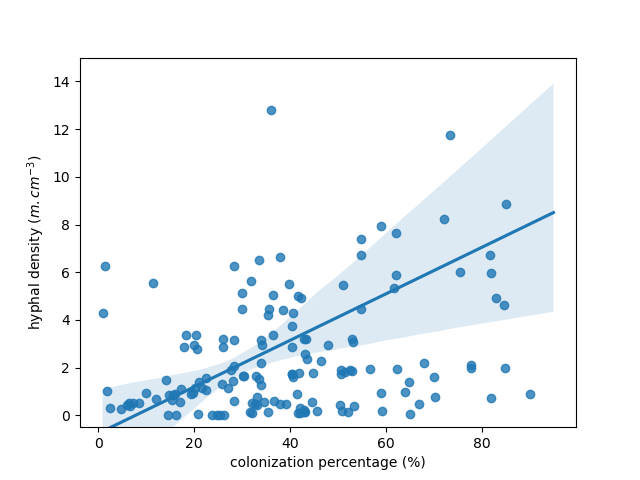

In [30]:
%matplotlib widget

sns.regplot(table,x="colonization_perc",y="hypha_m_cm3")
plt.ylabel('hyphal density ($m.cm^{-3}$)')
plt.xlabel('colonization percentage (%)')

plt.ylim(-0.5,15)

Text(0.5, 0, 'absolute latitude (°)')

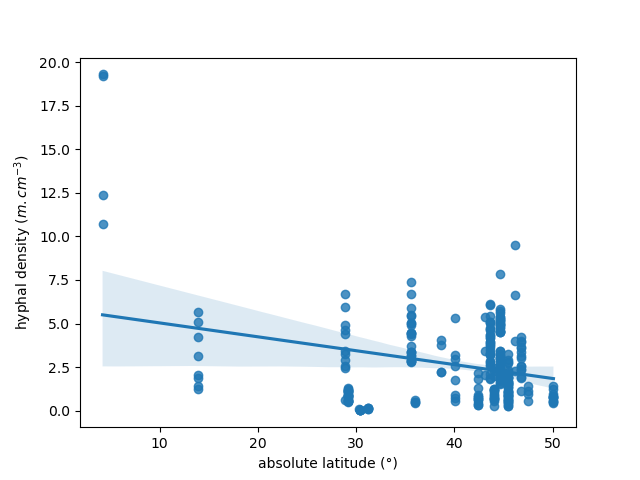

In [28]:
%matplotlib widget
select = table.loc[table["pot_field"]=="field"]

# select = select.loc[select["abs_lat"]>=10]

sns.regplot(select,x="abs_lat",y="hypha_m_cm3")
plt.ylabel('hyphal density ($m.cm^{-3}$)')
plt.xlabel('absolute latitude (°)')

<AxesSubplot: xlabel='pot_field', ylabel='hypha_m_cm3'>

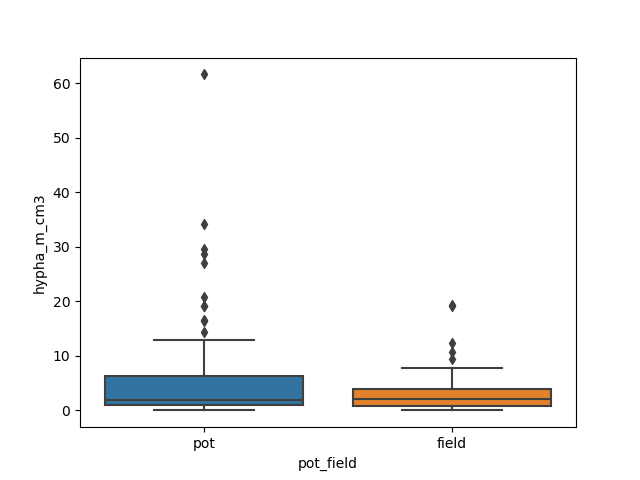

In [10]:
%matplotlib widget
select = table.loc[table["plant_functional_type"]=="grass"]
select = table
sns.boxplot(select,x="pot_field",y="hypha_m_cm3",)

<AxesSubplot: xlabel='landcover_8_clases_ESA', ylabel='colonization_perc'>

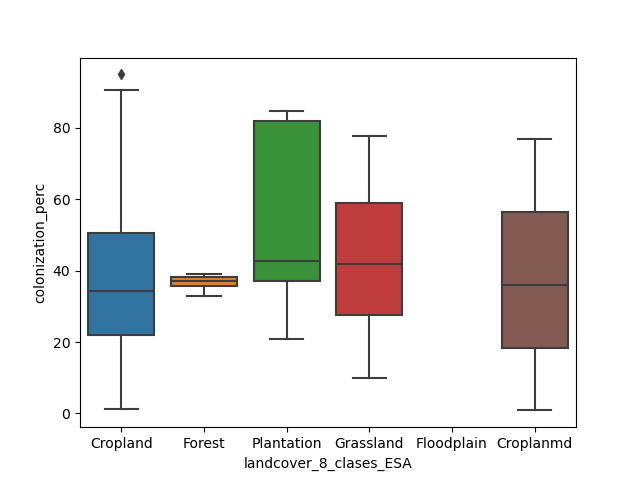

In [11]:
%matplotlib widget
# select = table.loc[table["landcover_8_clases_ESA"]=="grass"]
select = table
sns.boxplot(select,x="landcover_8_clases_ESA",y="colonization_perc",)

In [12]:
table.groupby('pot_field').count()

,Authors,Title,Year,Source title,Volume,Issue,Page start,Page end,DOI,Link,...,depth_cm,cm3_cm2,cm2_m2,hypha_m/m2,AM_factor_Soudvilovskaia2015,AM_C_g/g,hyphae_gC/m2_AM,Notes,hypha_mm_mm3,abs_lat
pot_field,,,,,,,,,,,,,,,,,,,,,
field,282,282,282,282,282,151,187,187,282,282,...,282,282,282,172,253,282,172,37,189,282
pot,105,105,105,105,105,58,95,95,105,100,...,105,105,105,59,105,105,59,41,59,105


<AxesSubplot: xlabel='Year', ylabel='hypha_m_cm3'>

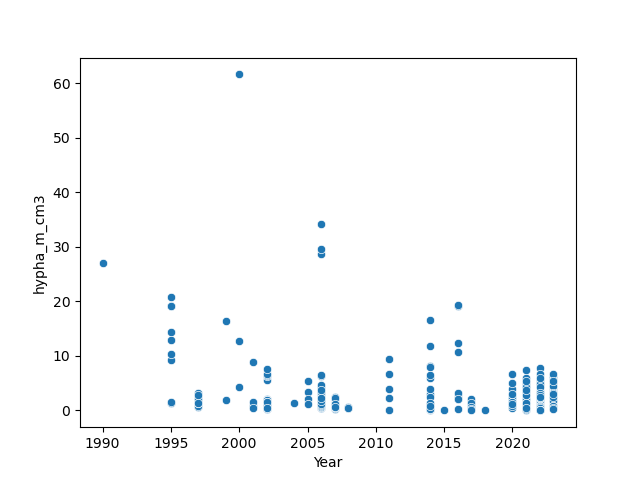

In [13]:
%matplotlib widget

sns.scatterplot(table,x="Year",y="hypha_m_cm3")
# plt.yscale("log")

In [14]:
np.min(table["hypha_m_cm3"]),np.max(table["hypha_m_cm3"])

(0.014499999999999999, 61.6)

In [15]:
table["plant_functional_type"].unique()

array(['crop', 'shrub', 'tree', 'grass', 'crop, tree', 'herb', 'crop ',
       nan], dtype=object)

<AxesSubplot: xlabel='plant_functional_type', ylabel='hypha_m_cm3'>

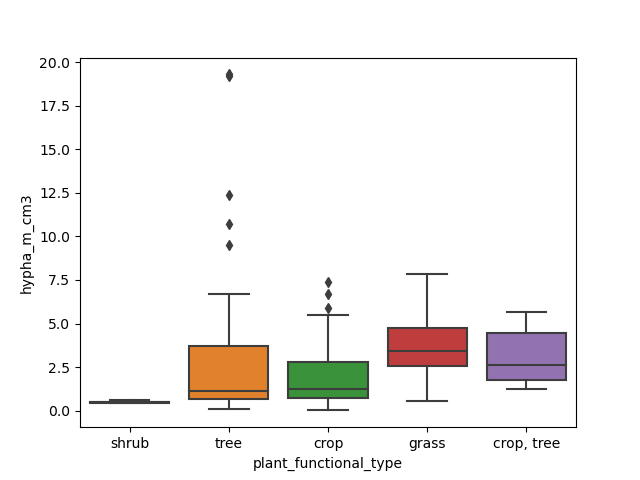

In [16]:
%matplotlib widget

table["plant_functional_type"].replace('crop ', 'crop', inplace=True)
select = table.loc[table["pot_field"]=="field"]

sns.boxplot(select,x="plant_functional_type",y="hypha_m_cm3",)

In [17]:
table["symbiont_genus"].replace('Natural ', 'Natural', inplace=True)
table["symbiont_genus"].replace('Glomus (dominant) ', 'Glomus', inplace=True)
table["symbiont_genus"].replace('Glomus (dominant)', 'Glomus', inplace=True)
table["symbiont_genus"].replace('Rhizophagus (dominant)', 'Rhizophagus', inplace=True)



table["symbiont_genus"].unique()

array(['Glomus', 'Gigaspora', nan, 'Rhizophagus',
       'Septoglomus (dominant)', 'Acaulospora', 'Scutellospora',
       'Entrophosphora', 'Natural',
       'Diversispora spurca, Glomus intraradices, G mosseae, G versiforme, Paraglomus occultum',
       'Septoglomus viscosum, Rhizophagus aggregatus, Acaulospora excavat, Sclerocystis sinosum, Glomus reticulatum',
       'Diversispora ', 'Funneliformis',
       'Acaulospora scrobiculata, Diversispora spurca, Diversispora versiformia'],
      dtype=object)

<AxesSubplot: xlabel='symbiont_genus', ylabel='hypha_m_cm3'>

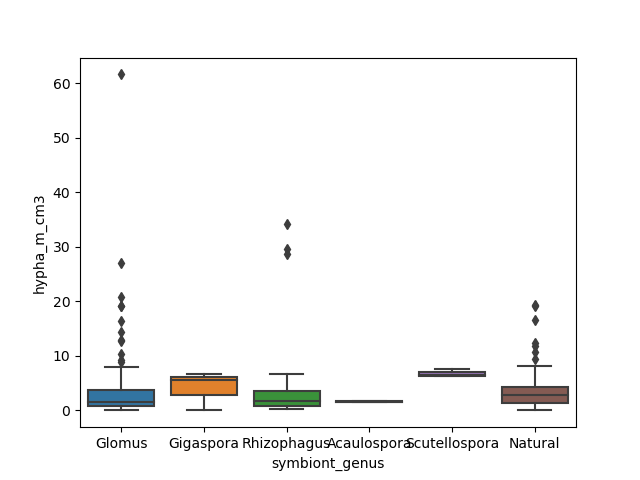

In [18]:
%matplotlib widget
select = table.loc[table["symbiont_genus"].isin(['Glomus', 'Gigaspora','Acaulospora', 'Scutellospora', 'Natural','Rhizophagus'])]
sns.boxplot(select,x="symbiont_genus",y="hypha_m_cm3",)